# Import Libraries

In [97]:
import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

---
# Import Datasets

*payment.csv*     : **paymentdf**  
*loan.csv*        : **loandf**   
*clarity_underwriting_variables.csv* : **claritydf**  

In [98]:
subdirectory = "data"
payment_path = os.path.join(subdirectory, "payment.csv")
loan_path = os.path.join(subdirectory, "loan.csv")
clarity_path = os.path.join(subdirectory, "clarity_underwriting_variables.csv")

In [99]:
paymentdf = pd.read_csv(payment_path)
loandf = pd.read_csv(loan_path)
claritydf = pd.read_csv(clarity_path)


/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_54745/4177701096.py:3: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  claritydf = pd.read_csv(clarity_path)


---
# 1. Exploratory Data Analysis

In [100]:
# Show all the columns name of each dataframe
print("paymentdf columns:\n", paymentdf.columns)
print("\nloandf columns:\n", loandf.columns)
print("\nclaritydf columns:\n", claritydf.columns)

paymentdf columns:
 Index(['loanId', 'installmentIndex', 'isCollection', 'paymentDate',
       'principal', 'fees', 'paymentAmount', 'paymentStatus',
       'paymentReturnCode'],
      dtype='object')

loandf columns:
 Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

claritydf columns:
 Index(['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearf

In [101]:
# Rename the columns name of claritydf, change all columns consist of ".underwritingdataclarity.clearfraud" to ""
# For better readability
claritydf.columns = [col.replace(".underwritingdataclarity.clearfraud.clear", "") for col in claritydf.columns]
claritydf.columns


Index(['fraudinquiry.thirtydaysago', 'fraudinquiry.twentyfourhoursago',
       'fraudinquiry.oneminuteago', 'fraudinquiry.onehourago',
       'fraudinquiry.ninetydaysago', 'fraudinquiry.sevendaysago',
       'fraudinquiry.tenminutesago', 'fraudinquiry.fifteendaysago',
       'fraudinquiry.threesixtyfivedaysago',
       'fraudindicator.inquiryonfilecurrentaddressconflict',
       'fraudindicator.totalnumberoffraudindicators',
       'fraudindicator.telephonenumberinconsistentwithaddress',
       'fraudindicator.inquiryageyoungerthanssnissuedate',
       'fraudindicator.onfileaddresscautious',
       'fraudindicator.inquiryaddressnonresidential',
       'fraudindicator.onfileaddresshighrisk',
       'fraudindicator.ssnreportedmorefrequentlyforanother',
       'fraudindicator.currentaddressreportedbytradeopenlt90days',
       'fraudindicator.inputssninvalid',
       'fraudindicator.inputssnissuedatecannotbeverified',
       'fraudindicator.inquiryaddresscautious',
       'fraudindicator.m

In [102]:
# Show the data types of each column of loandf
print("\n------------Data Types-----------------")
print(loandf.dtypes)
print("\n--------------Shape--------------------")
print("Shape:", loandf.shape)

# Count missing values for each column
print("\n------------Missing Values-----------------")
print(loandf.isnull().sum())

# Count number of unique values for each column
print("\n------------Unique Values-----------------")
print(loandf.nunique())

# loandf data summary
print("\n------------Summary-----------------")
print(loandf.describe())

# Show the first 5 rows of loandf
print("\n------------First 5 rows-----------------")
loandf.head()


------------Data Types-----------------
loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

--------------Shape--------------------
Shape: (577682, 19)

------------Missing Values-----------------
loa

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [103]:
# 

---
# 2. Data Preprocessing

## 2.1 Preprocess paymentdf / payment.csv
- From payment.csv / paymentdf, we can see that a good borrower will successfully complete most of the repayment. along all the installments. While a bad borrower will unable to complete theiry repayments on time.
- This can be indicated by numerous of "Checked" value in column *paymentStatus* of a *loanId*.
- Thus, I plan to calculate the percentage of "Checked" value over the number of installments, noted as checked.
- For example, if there are 12 records for a loan and 4 records contains "Checked" then the value will be 4/12, 0.33


In [104]:
# Create a new dataframe with "loanId" and "relativeCheckedFrequency" columns
# For each loanId in paymentdf, calculate the relativeCheckedFrequency.
# relativeCheckedFrequency =  number of value "Checked" / total number of rows of the loanId
# For example, if there are 3 rows with value "Checked" and 2 rows with value "Unchecked" for a loanId,
# then the relativeCheckedFrequency = 3 / (3 + 2) = 0.6s

# Calculate the relativeCheckedFrequency for each loanId
grouped = paymentdf.groupby('loanId')['paymentStatus'].apply(lambda x: (x == 'Checked').sum() / len(x))

# Create a new DataFrame with 'loanId' and 'relativeCheckedFrequency' columns
checkedFrequencyDf = pd.DataFrame({'loanId': grouped.index, 'relativeCheckedFrequency': grouped.values})

# Output the new checkedFrequencyDf
print(checkedFrequencyDf)

# combine checkedFrequencyDf with loandf by using loan ID
modelDf = pd.merge(loandf, checkedFrequencyDf, on='loanId', how='left')

# Impute the null values with -0.1
modelDf['relativeCheckedFrequency'] = modelDf['relativeCheckedFrequency'].fillna(-0.05)

modelDf.head()


              loanId  relativeCheckedFrequency
0      LL-I-00000021                  0.923077
1      LL-I-00000231                  0.100000
2      LL-I-00000238                  0.437500
3      LL-I-00000308                  0.045455
4      LL-I-00000355                  0.000000
...              ...                       ...
39947  LP-I-00000127                  1.000000
39948  LP-I-00000134                  0.142857
39949  LP-I-00000139                  0.800000
39950  LP-I-00000142                  0.000000
39951  LP-I-00000145                  1.000000

[39952 rows x 2 columns]


,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,relativeCheckedFrequency
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1,-0.05
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0.88
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1,-0.05
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1,-0.05
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1,-0.05


Now, we will try to verify whether relativeCheckedFrequency is a reflected the status of a borrower.  
We will do 2 test:  
1. Test whether relativeCheckedFrequency is correlated with loanStatus = "Paid Off Loan", "Paid Off Loan" borrower should has higher relativeCheckedFrequency.  
   
2. Test whether relativeCheckedFrequency is correlated with loanStatus = "Defaulted Loan", "Defaulted Loan" borrower should has lower relativeCheckedFrequency.


/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_54745/470453583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paidOffDf['relativeCheckedFrequency_class'] = pd.cut(paidOffDf['relativeCheckedFrequency'], bins)


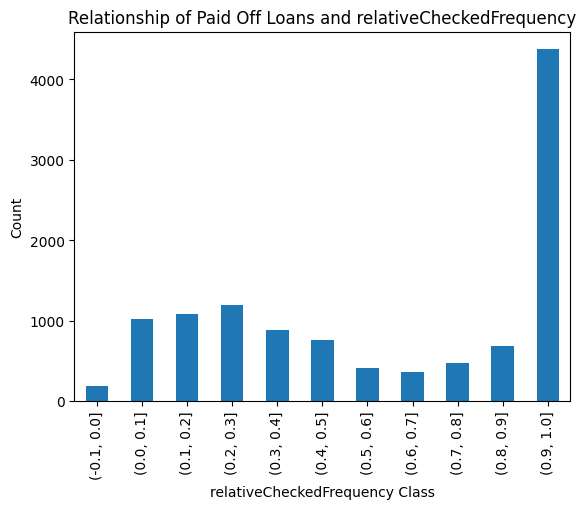

Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv


In [105]:
# Select row with value Paid Off Loan in loanStatus column
paidOffDf = modelDf[modelDf['loanStatus'] == 'Paid Off Loan']

# Define the boundaries of the classes you're interested in
bins = [x for x in np.arange(-0.1, 1.05, 0.1)]

# Create a new column 'relativeCheckedFrequency_class' that indicates which class each value falls into
paidOffDf['relativeCheckedFrequency_class'] = pd.cut(paidOffDf['relativeCheckedFrequency'], bins)

# Plot the histogram
paidOffDf['relativeCheckedFrequency_class'].value_counts().sort_index().plot(kind='bar')

# Add labels and title, then show the plot
plt.xlabel('relativeCheckedFrequency Class')
plt.ylabel('Count')
plt.title('Relationship of Paid Off Loans and relativeCheckedFrequency')
plt.show()
print("Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv")

We observed that the relativeCheckedFrequency is highly associated with the loanStatus of "Paid Off".  
When the loanStatus is "Paid Off", the relativeCheckedFrequency is higher.  
We proved Test 1.  

/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_54745/1119306527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedDf['relativeCheckedFrequency_class'] = pd.cut(defaultedDf['relativeCheckedFrequency'], bins)


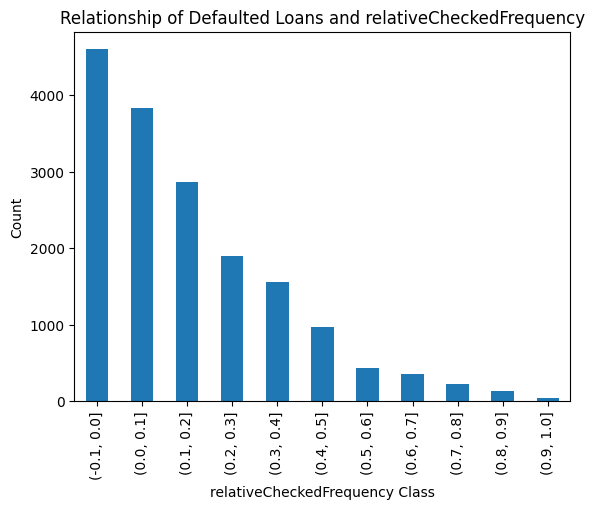

Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv


In [110]:
# Select row with value Paid Off Loan in loanStatus column
defaultedStatus = ['Internal Collection', 'External Collection']
defaultedDf = modelDf[modelDf['loanStatus'].isin(defaultedStatus)]

# Define the boundaries of the classes you're interested in
bins = [x for x in np.arange(-0.1, 1.05, 0.1)]

# Create a new column 'relativeCheckedFrequency_class' that indicates which class each value falls into
defaultedDf['relativeCheckedFrequency_class'] = pd.cut(defaultedDf['relativeCheckedFrequency'], bins)

# Plot a histogram
defaultedDf['relativeCheckedFrequency_class'].value_counts().sort_index().plot(kind='bar')

# Add labels and title, plot the figure
plt.xlabel('relativeCheckedFrequency Class')
plt.ylabel('Count')
plt.title('Relationship of Defaulted Loans and relativeCheckedFrequency')
plt.show()
print("Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv")

We observed that the relativeCheckedFrequency is highly associated with the loanStatus of Debt Collection ('Internal Collection', 'External Collection').  
When the loanStatus is "Debt Collection", the relativeCheckedFrequency is low.   
We proved Test 2.   

**In conclusion, we can use relativeCheckedFrequency as an element to indicate the quality of loan.**  
**In other words, we may involve *relativeCheckedFrequency* in our target variable.**

## 2.2 Preprocess loandf / loan.csv   
   
Potentially unuseful columns
- *originatedDate*
    - Only include it, if we are considering the timeline application is submitted
- *isFunded*
    - The loan is ultimately funded depends on the willingness of candidates, thus, it does not affect the qualification of a candidate.

Notes:
- Consider relationship of *loanStatus* and *approved* 
    - Even though the *approved* is false, but it might due to application withdrawal, which doesn't mean he/she a unqualified candidate

Target Variable
- *loanStatus* will be the first prioritised target value

Question:
- What is the relationship of *loanAmount* and *originallyScheduledPaymentAmount*?


### 2.2.1 Preprocess loandf Target Variable - *loanStatus*

In [ ]:
# Count every unique values in column loanStatus
print(loandf["loanStatus"].value_counts())

loanStatus
Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Rescind                     4
Pending Application                 4
Voided New Loan                     2
Charged Off                         1
Customver Voided New Loan           1
Settlement Pending Paid Off         1
Name: count, dtype: int64


#### 2.2.1.1 Remove small classes that frequency has lower than 100 to reduce the complexity of the model.

In [ ]:
# Identify the rows the with less than 50 records in column loanStatus
small_class_loanStatus_values_list = loandf["loanStatus"].value_counts()[loandf["loanStatus"].value_counts() < 50]

# Drop row of loanStatus with these values in small_class_loanStatus_values_list
loandf = loandf[~loandf["loanStatus"].isin(small_class_loanStatus_values_list.index)]


#### 2.2.1.2 Process (remove & combine) classes of loanStatus

In [ ]:
# Count every unique values in column loanStatus
print(loandf["loanStatus"].value_counts())

loanStatus
Withdrawn Application       450984
Rejected                     85070
Paid Off Loan                11427
External Collection          11334
New Loan                      8112
Internal Collection           5567
Returned Item                 1182
CSR Voided New Loan           1026
Settlement Paid Off            708
Credit Return Void             704
Customer Voided New Loan       504
Settled Bankruptcy             326
Pending Paid Off               169
Charged Off Paid Off           160
Name: count, dtype: int64


We can see that there are many classes to be predicted. We will remove meaningless classes, combine similar classes until left "Defaulted Loan" & "Paid Off Loan" only.

1. We will remove "Withdrawn Application", "Rejected", "CSR Voided New Loan", "Customer Voided New Loan", because these applications are not yet classified thus it is meaningless.
   - I assume "Withdrawn Application" is the application that is withdrawn by the applicant, thus it is not yet classified.
   - I assume "Rejected" is due to the applicant didn't submit the required documents, thus it is not yet classified.
   - I do not know why "CSR Voided New Loan", thus it will be removed until further information is provided.
   - I assume "Customer Voided New Loan" is due to the applicant changed his/her mind, thus it is not yet classified.  
\    
2. We will assume "External Collection" and "Internal Collection" as "Defaulted Loan".
   - I assume "External Collection" is the loan that is being collected by external collection agency, thus it was defaulted.
   - I assume "Internal Collection" is the loan that is being collected by internal collection deparment, thus it was defaulted.  
\  
3. "Settlement Paid Off", "Settled Bankruptcy", "Charged Off Paid Off" will be considered "Defaulted Loan"
   - For "Settlement Paid Off", I assume the borrower was unable to repay the full loan amount, so they agreed with the lender to pay a lesser amount to satisfy the debt, thus considered as defaulted.
   - For "Settled Bankruptcy", I assume the borrower declared bankruptcy, and the debt was included and resolved in the bankruptcy proceedings, thus considered as defaulted.
   - For "Charged Off Paid Odd", The loan was declared as a loss by the lender (charged off), but was subsequently paid off by the borrower or collections. However, it is still considered as defaulted.  
\  
4. "Pending Paid Off" will be assumed as "Paid Off Loan"

5. "New Loan" "Returned Item" will be considered 

We will try to label the target value accordingly, like Paid Off Loan will be the best condition.

In [ ]:
# We can see that there are many classes to be predicted. We will study and remove the unwanted classes.

# We will remove "Withdrawn Application" because these applications are not yet classified thus it is meaningless.

# We will remove small classes that frequency has lower than 100.

# We will combine "External Collection" and "Internal Collection" as a single value, "Debt Collection".

### Duplicates

In [ ]:
# Check duplicates in loandf
# Check any repeated rows
print("Number of duplicated rows:", loandf.duplicated().sum())

# print "No duplicates found" if there is no duplicated rows
if loandf.duplicated().sum() > 0:
    print("Duplicates found")
else:
    print ("No duplicates found.")




Number of duplicated rows: 0
No duplicates found.


### Remove unwanted columns  
Columns to be dropped:
- *loanId*
    - Doesn't affect the qualification of borrower, but used as reference to claritydf.
- *originated*
    - Orginated or not will not affect the qualification of a borrower, however, an orginated application is a pre-condition for a loan to be approved, thus, it will cause data leakage. 
- *originatedDate*
    - Only include it, if we are considering the timeline application is submitted
    - Too many missing values
- *isFunded*
    - Whether the loan will be ultimately funded depends on the willingness of borrower, thus, it does not affect the qualification of a borrower.
    - This will also cause data leakage, because *isFunded* will only be known after *loanStatus* is determined.
- *approved*
    - This will also cause data leakage, because *loanStatus* is strongly relying on the value of *approved*, we should able to predict loanStatus before approval is given.


In [ ]:
# Drop the columns stated above
loandf.drop([ "loanId", "originated", "originatedDate", "isFunded", "approved"], axis=1, inplace=True)

### Impute missing value

In [ ]:
# Show the data types of each column of loandf
print("\n------------Data Types-----------------")
print(loandf.dtypes)
print("\n--------------Shape--------------------")
print("Shape:", loandf.shape)

# Count missing values for each column
print("\n------------Missing Values-----------------")
print(loandf.isnull().sum())

# Count number of unique values for each column
print("\n------------Unique Values-----------------")
print(loandf.nunique())


------------Data Types-----------------
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
nPaidOff                            float64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

--------------Shape--------------------
Shape: (577682, 14)

------------Missing Values-----------------
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
nPaidOff                                24
loanStat

In [ ]:
# List the unique values for all columns
print("\n------------Unique Values-----------------")
print("payFrequency:", loandf["payFrequency"].unique())
print("\napr:", loandf["apr"].unique())
print("\napplicationDate:", loandf["applicationDate"].unique())
print("\nnPaidOff:", loandf["nPaidOff"].unique())
print("\nloanStatus:", loandf["loanStatus"].unique())
print("\nloanAmount:", loandf["loanAmount"].unique())
print("\noriginallyScheduledPaymentAmount:", loandf["originallyScheduledPaymentAmount"].unique())
print("\nstate:", loandf["state"].unique())
print("\nleadType:", loandf["leadType"].unique())
print("\nleadCost:", loandf["leadCost"].unique())
print("\nfpStatus:", loandf["fpStatus"].unique())
print("\nclarityFraudId:", loandf["clarityFraudId"].unique())
print("\nhasCF:", loandf["hasCF"].unique())




------------Unique Values-----------------
payFrequency: ['B' 'M' 'S' 'I' 'W' nan]

apr: [360.     199.     590.     650.     680.     449.99   251.     645.
 475.     490.     525.     359.     681.     601.     404.1    315.
 390.     625.     550.     180.2         nan 449.     600.     325.
 205.     159.     472.     404.991  516.25   239.     300.     565.
 441.     290.     208.     175.     595.875   95.     465.     194.
 501.5    240.     306.     217.       0.     580.     585.     531.
 540.     500.     324.     400.     510.     478.67   442.89   171.
 381.65   546.875  228.     160.     242.     428.75   455.     568.75
 139.125  231.     241.     427.5    570.32   351.     540.9    440.
 562.5    515.      44.     182.     416.5    555.     340.     288.
 439.     382.4915 265.     365.     552.5    505.     415.     355.
 578.     612.9    612.     480.     510.85   127.2    531.25   530.
 705.59   143.1     29.99   564.375  660.     135.15   213.35    36.
 392.     5

Way to address columns with missing value:
- payFrequency
- nPaidOff: Impute value '0' if missing
- 

In [ ]:
# Address missing values for each column

# nPaidOff
# Drop missing values rows in nPaidOff column
loandf.dropna(subset=["nPaidOff"], inplace=True)

# payFrequency
# Impute "W" for missing values in payFrequency column
loandf["payFrequency"].fillna("W", inplace=True)

#loanAmount
#Print rows with missing values in loanAmount column
print(loandf[loandf["loanAmount"].isnull()])
# Drop missing values rows in loanAmount column
loandf.dropna(subset=["loanAmount"], inplace=True)

# Check if there is any missing values in nPaidOff column
print(loandf["nPaidOff"].isnull().sum())


                                anon_ssn payFrequency  apr   
136     ffecddf04ba321d5cc545f252c3be2e1            B  NaN  \
280     4bd3bb45e34c1c6d1dde8979425db2e4            B  NaN   
334     0079d6e4dafaf229cf87cf6d736cdd40            W  NaN   
633     c9b80d8aba176fd4301f1d835e3ae71e            B  NaN   
767     2011b7e6ea08987d33fa4b033251e6ef            W  NaN   
...                                  ...          ...  ...   
575990  4ec91cec26d211035500ab7fa0ffcf52            B  NaN   
576342  bfd56e031c07d1985ca750b445af65bb            W  NaN   
576608  b5bb9d00331bc6ca200e6a458422dafd            B  NaN   
576750  0e167ef89a18b18d8c9d89551ef000b4            B  NaN   
577306  41db5f95c3d05aef05649d7c3d836a5c            B  NaN   

                   applicationDate  nPaidOff             loanStatus   
136     2016-06-07T13:56:27.616000       0.0  Withdrawn Application  \
280     2016-03-17T17:38:09.369000       0.0  Withdrawn Application   
334     2016-01-14T18:03:33.105000       0

### Remove unwanted rows

In [ ]:
# Remove rows with loanAmount is N/A

## Preprocess paymentdf / payment.csv

## Preprocess claritydf / clarity_underwriting_variables.csv

# Data Modeling

# Model Evaluation

We will use "False Negative" as our metrics to evaluate our models, because we want to reduce financial impact of lending money to borrower who will default the loan.